In [1]:
import numpy as np
import pint
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from pint import Quantity
from scipy import constants
from scipy.constants import physical_constants

In [2]:
si = pint.UnitRegistry()

Q_ = si.Quantity
si.formatter.default_format = "~P"
si.setup_matplotlib()

In [3]:
def rho(p, R, T) -> Quantity:
    return p / (R * T)


R_str = Q_(*physical_constants["molar gas constant"][:2])
Md = Q_(28.966, "g/mol")


rho_air = rho(
    p=Q_(1000, "hPa"),
    R=R_str / Md,
    T=Q_(300, "K"),
)

print(f"{rho_air.to_base_units():.3g~P} = {rho_air.to(si.g / si.cm**3):.3g~P}\n")

1.16 kg/m³ = 0.00116 g/cm³



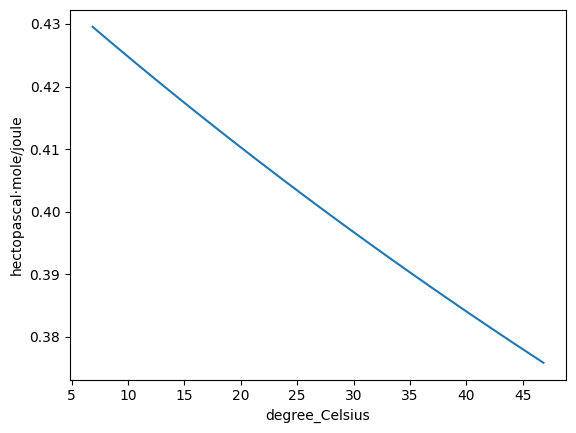

In [4]:
fig, ax = pyplot.subplots()
T = Q_(np.linspace(280, 320), "K")
ax.plot(T, rho(Q_(1000, "hPa"), R_str, T))
fig.gca().xaxis.set_units(si.celsius)